### Convert image to patch.

In [1]:
import os
from pyrsimg import readTiff
from pyrsimg import imgShow, imsShow
from pyrsimg import img2patch
from pyrsimg import crop2size, crop2extent
import matplotlib.pyplot as plt
import numpy as np


In [2]:
root_path = os.getcwd().split('pyrsimg')[0] + 'pyrsimg'
path_img = root_path + '/docs/source/examples/data/l8_scene_05.tif'
path_truth = root_path + '/docs/source/examples/data/l8_scene_05_truth.tif'


#### 1. Read the remote sensing image.

In [3]:
l8_img = readTiff(path_img)
l8_truth = readTiff(path_truth)
l8_img.array.shape


/Users/luo/miniconda3/envs/venv-pyrsimg/lib/python3.9/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


ERROR 4: `/Users/luo/Library/CloudStorage/OneDrive-Personal/GitHub/pyrsimg/docs/source/examples/data/l8_scene_05.tif' not recognized as a supported file format.


KeyboardInterrupt: 

#### 2. Visualize the image.

Text(0.5, 1.0, 'groud truth')

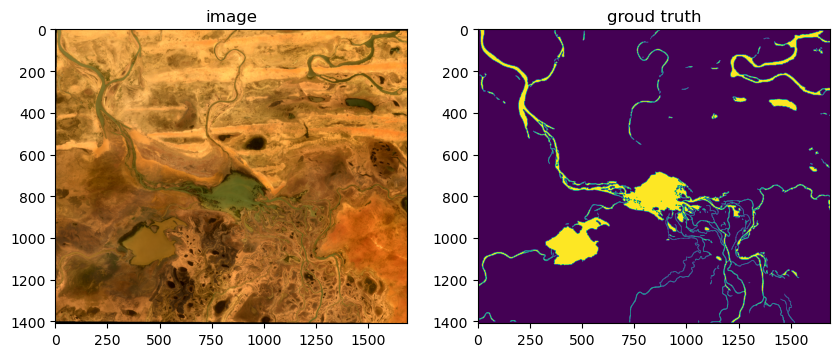

In [28]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
imgShow(l8_img.array, ax=ax[0])
ax[1].imshow(l8_truth.array)
ax[0].set_title('image')
ax[1].set_title('groud truth')


#### 3. Convert the full image to multiple patches.
3.1 Convert image to patches.

In [29]:
imgPat_ins = img2patch(img=l8_img.array, patch_size=200, edge_overlay = 30)
patch_low_list = imgPat_ins.toPatch()
print('The number of patches from image:' ,len(patch_low_list))


The number of patches from image: 99


3.2. Convert image to higher-scale patches.


In [30]:
patch_high_list = imgPat_ins.higher_patch_crop(higher_patch_size=300)

3.3. Check the converted multiscale patches.

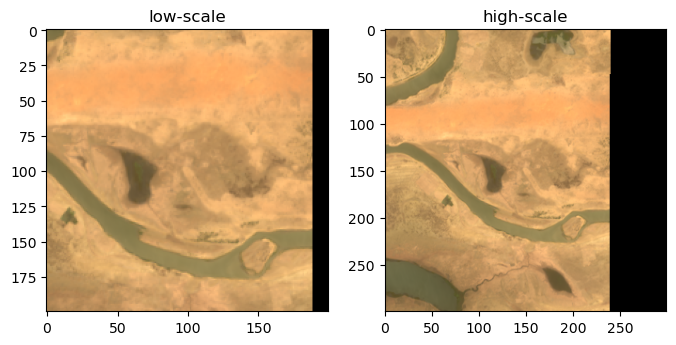

In [31]:
i_img = 20
fig, ax = plt.subplots(1, 2, figsize=(8,4))
imsShow(img_list=[patch_low_list[i_img], patch_high_list[i_img]], \
                    img_name_list=['low-scale', 'high-scale'], clip_list=[2,2])

#### 4. Crop image.
4.1 Image cropping with specific size


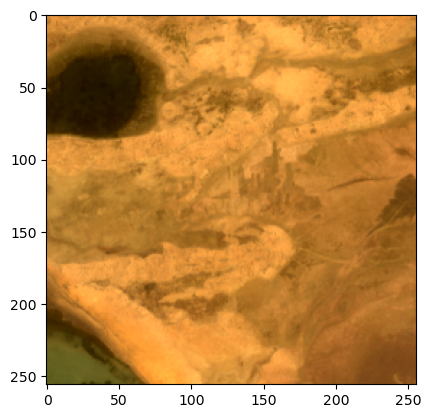

In [32]:
img2size = crop2size(img=l8_img.array, channel_first=False)
patch = img2size.toSize(size=(256,256))
imgShow(patch)


4.2. Image cropping with multiscale sizes.


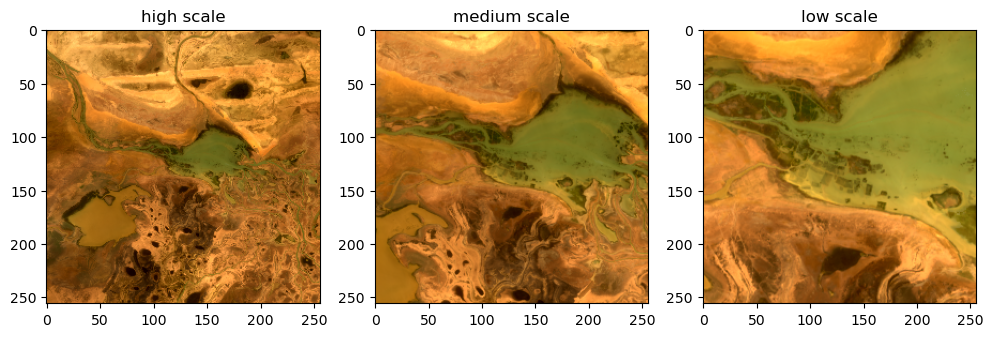

In [33]:
fig, ax = plt.subplots(1,3,figsize=(12, 4))
patches = img2size.toScales(scales=(1024,512,256))
imsShow(img_list=patches, img_name_list=['high scale', 'medium scale', 'low scale'])


4.3. Image cropping with specific extent

Text(0.5, 1.0, 'The croped image')

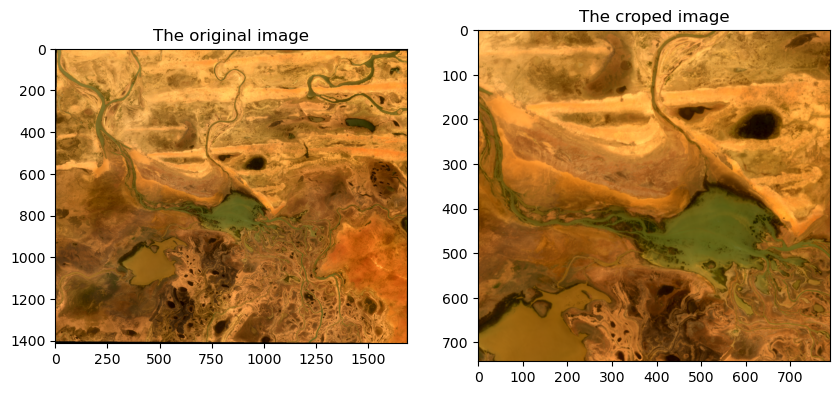

In [35]:
img2extent = crop2extent(extent=[368155.0, 391855.0, 1683985.0, 1706285.0])
patch_extent = img2extent.img2extent(path_img=path_img)
fig, ax = plt.subplots(1,2,figsize=(10,5))
imgShow(img=l8_img.array, ax=ax[0])
ax[0].set_title('The original image')
imgShow(patch_extent, ax=ax[1])
ax[1].set_title('The croped image')
